54000/54000 [==============================] - 6s - loss: 0.2354 - acc: 0.9302 - val_loss: 0.0960 - val_acc: 0.9718
Epoch 2/20
54000/54000 [==============================] - 1s - loss: 0.0846 - acc: 0.9740 - val_loss: 0.0812 - val_acc: 0.9758
Epoch 3/20
54000/54000 [==============================] - 1s - loss: 0.0527 - acc: 0.9832 - val_loss: 0.0799 - val_acc: 0.9757
Epoch 4/20
54000/54000 [==============================] - 1s - loss: 0.0356 - acc: 0.9883 - val_loss: 0.0678 - val_acc: 0.9803
Epoch 5/20
54000/54000 [==============================] - 1s - loss: 0.0269 - acc: 0.9915 - val_loss: 0.0824 - val_acc: 0.9795
Epoch 6/20
54000/54000 [==============================] - 1s - loss: 0.0220 - acc: 0.9927 - val_loss: 0.0684 - val_acc: 0.9808
Epoch 7/20
54000/54000 [==============================] - 1s - loss: 0.0203 - acc: 0.9933 - val_loss: 0.0788 - val_acc: 0.9798
Epoch 8/20
54000/54000 [==============================] - 1s - loss: 0.0153 - acc: 0.9948 - val_loss: 0.0838 - val_acc: 0.

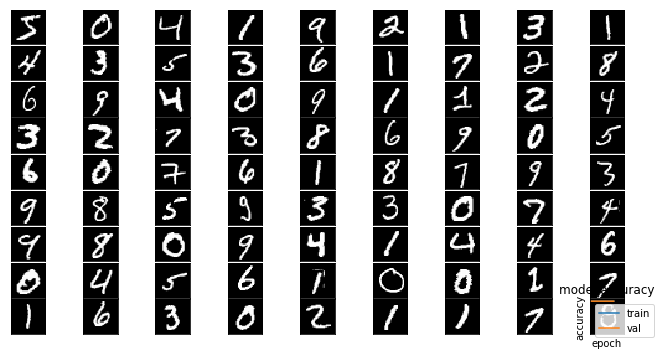

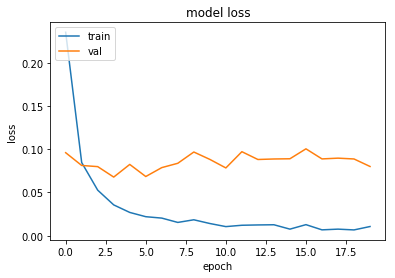

accuracy: 0.9825
[[ 971    1    0    1    0    2    3    1    1    0]
 [   0 1125    1    0    0    1    1    1    5    1]
 [   2    0 1007    4    5    0    4    6    3    1]
 [   0    0    2  985    0   12    0    3    2    6]
 [   0    0    3    0  961    0    3    0    0   15]
 [   2    0    0    2    2  882    1    0    1    2]
 [   1    3    0    1    4    5  943    0    1    0]
 [   0    0    9    0    1    0    0 1005    2   11]
 [   3    1    1    5    4    1    2    3  944   10]
 [   1    1    1    0    2    1    0    1    0 1002]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.99      0.98      0.98      1010
          4       0.98      0.98      0.98       982
          5       0.98      0.99      0.98       892
          6       0.99      0.98      0.98       958
          7       0.99     

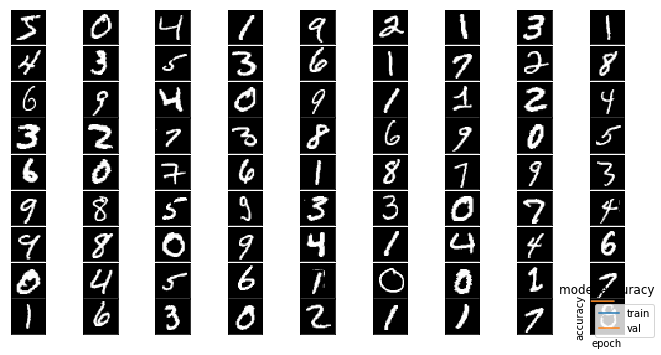

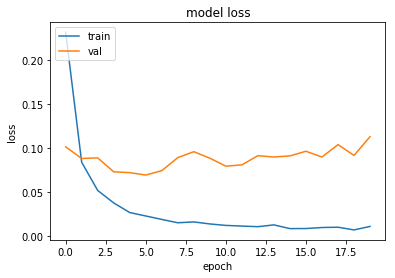

accuracy: 0.9798
[[ 971    1    0    0    0    0    3    1    1    3]
 [   1 1129    0    0    0    0    1    1    3    0]
 [   1    3 1010    0    0    0    3    8    7    0]
 [   1    0    9  981    0    2    0   10    3    4]
 [   1    1    6    1  942    0    3    3    1   24]
 [   2    0    0    7    1  870    9    0    2    1]
 [   2    2    1    0    2    1  950    0    0    0]
 [   0    3    7    0    1    0    0 1006    4    7]
 [   3    0    1    3    3    2    5    4  950    3]
 [   0    3    0    1    3    5    1    5    2  989]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.99      0.97      0.98      1010
          4       0.99      0.96      0.97       982
          5       0.99      0.98      0.98       892
          6       0.97      0.99      0.98       958
          7       0.97     

In [2]:
from keras.datasets import mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9,9,i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28,28)), cmap='gray')
    
from keras.utils import np_utils
nb_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samlpes')
print(x_test.shape[0], 'test_samples')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)   

from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

batch_size = 128
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1,
                            verbose=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

from sklearn.metrics import classification_report, confusion_matrix

labels_pred = model.predict_classes(x_test, verbose=0)

print(confusion_matrix(y_test, labels_pred))
print(classification_report(y_test, labels_pred))


In [3]:
from keras.datasets import mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()

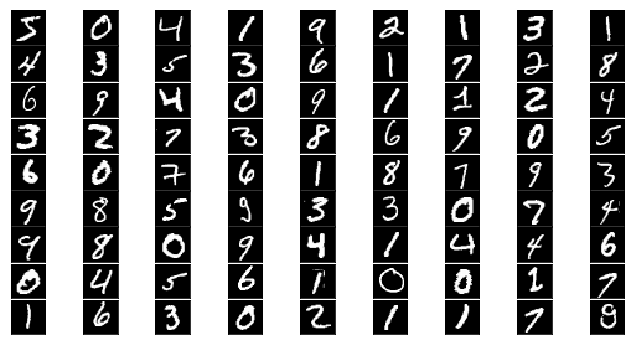

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9,9,i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28,28)), cmap='gray')

In [5]:
from keras.utils import np_utils
nb_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samlpes')
print(x_test.shape[0], 'test_samples')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

(60000, 'train samlpes')
(10000, 'test_samples')


In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [8]:
batch_size = 128
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1,
                            verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s - loss: 0.2351 - acc: 0.9302 - val_loss: 0.0942 - val_acc: 0.9708
Epoch 2/20
54000/54000 [==============================] - 1s - loss: 0.0837 - acc: 0.9743 - val_loss: 0.0736 - val_acc: 0.9755
Epoch 3/20
54000/54000 [==============================] - 1s - loss: 0.0522 - acc: 0.9837 - val_loss: 0.0690 - val_acc: 0.9802
Epoch 4/20
54000/54000 [==============================] - 1s - loss: 0.0364 - acc: 0.9883 - val_loss: 0.0736 - val_acc: 0.9795
Epoch 5/20
54000/54000 [==============================] - 1s - loss: 0.0286 - acc: 0.9903 - val_loss: 0.0750 - val_acc: 0.9805
Epoch 6/20
54000/54000 [==============================] - 1s - loss: 0.0227 - acc: 0.9923 - val_loss: 0.0698 - val_acc: 0.9813
Epoch 7/20
54000/54000 [==============================] - 1s - loss: 0.0184 - acc: 0.9939 - val_loss: 0.0694 - val_acc: 0.9817
Epoch 8/20
54000/54000 [==============================] - 1s -

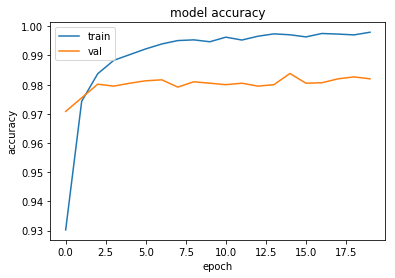

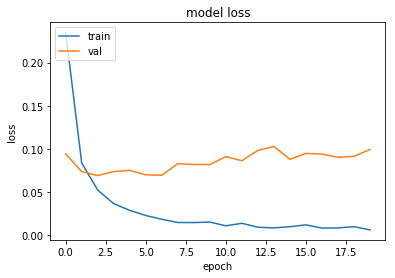

accuracy: 0.9822


In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

labels_pred = model.predict_classes(x_test, verbose=0)

print(confusion_matrix(y_test, labels_pred))
print(classification_report(y_test, labels_pred))

[[ 970    1    1    1    1    0    2    0    1    3]
 [   0 1126    3    0    0    0    2    1    3    0]
 [   0    0 1025    2    1    0    0    3    1    0]
 [   0    0    5  989    0    1    0    6    3    6]
 [   0    0    2    1  953    0    5    4    0   17]
 [   1    0    0   12    0  863    5    1    4    6]
 [   2    2    4    1    4    2  941    0    2    0]
 [   0    0   13    0    0    0    0 1009    1    5]
 [   1    2    6    5    0    0    1    5  950    4]
 [   0    2    0    2    4    1    1    2    1  996]]
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.99      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.97      0.98       982
          5       1.00      0.97      0.98       892
          6       0.98      0.98      0.98       958
          7       0.98      0.98      0.98  